In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
ddq_test_score = pd.read_csv('./ddq_results/run-20220402_153741_BreakoutNoFrameskip-v4_summary-tag-Test score.csv')
ddq_loss = pd.read_csv('./ddq_results/run-20220402_153741_BreakoutNoFrameskip-v4_summary-tag-Loss.csv')

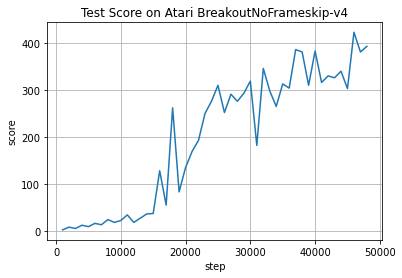

In [16]:
# Data for plotting
t = ddq_test_score.Step
s = ddq_test_score.Value

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='step', ylabel='score',
       title='Test Score on Atari BreakoutNoFrameskip-v4')
ax.grid()

fig.savefig("test.png")
plt.show()

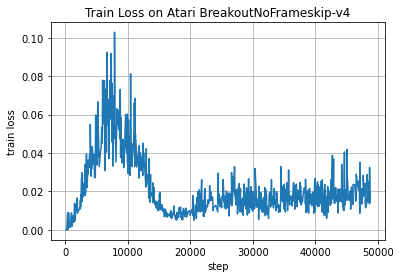

In [19]:
# Data for plotting
t = ddq_loss.Step
s = ddq_loss.Value

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='step', ylabel='train loss',
       title='Train Loss on Atari BreakoutNoFrameskip-v4')
ax.grid()

fig.savefig("test.png")
plt.show()

In [20]:
import json

with open("./decision_results/record_400000.json") as f:
    decision_data = json.load(f)
    f.close()

In [24]:
decision_loss = []
decision_step = []
for data in decision_data['train']:
    if data['epoch'] == 4:
        decision_loss.append(data['train_loss'])
        decision_step.append(data['iter'])

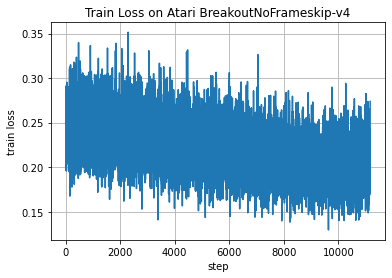

In [25]:
# Data for plotting
t = decision_step
s = decision_loss

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='step', ylabel='train loss',
       title='Train Loss on Atari BreakoutNoFrameskip-v4')
ax.grid()

fig.savefig("test.png")
plt.show()

In [26]:
decision_score = decision_data['eval']

In [27]:
decision_score

[{'target_return': 90, 'eval_return': 54.8},
 {'target_return': 90, 'eval_return': 48.1},
 {'target_return': 90, 'eval_return': 49.5},
 {'target_return': 90, 'eval_return': 75.1},
 {'target_return': 90, 'eval_return': 67.8}]